# Data preparation

1. Understanding the data
2. Pre-processing the data

---

## 1. Understanding the data

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.color import rgb2lab, rgb2gray, lab2rgb
from skimage.io import imread, imshow

In [98]:
silver = imread(fname = "Images/PokemonSilver/PokemonSilver_227.jpg")
blue = imread(fname = "Images/PokemonBlue/PokemonBlue_264.jpg")

In [122]:
# Define functions to help with understanding the images

def RGBimage_summary(RGBimage):

    '''Prints a summary of key information of an image and
    prints the image together with is RGB breakdown.'''
    
    print("-------------")
    print("Image Summary")
    print("-------------")
    
    RGBimg = RGBimage
    
    img_type = type(RGBimg)
    print(f"Object type: {img_type}")
    
    img_dim = RGBimg.shape
    img_height, img_width = img_dim[0], img_dim[1]
    print(F"Image dimensions: {img_dim}")

    img_nchannels = 1 if len(img_dim) == 2 else img_dim[-1]
    
    print(f"Number of channels: {img_nchannels}")
    
    if img_nchannels == 3:
        R_max, R_min = np.max(RGBimg[:, :, 0]), np.min(RGBimg[:, :, 0])
        G_max, G_min = np.max(RGBimg[:, :, 1]), np.min(RGBimg[:, :, 1])
        B_max, B_min = np.max(RGBimg[:, :, 2]), np.min(RGBimg[:, :, 2])
        
        print (f"R range: [{R_min}, {R_max}]")
        print (f"G range: [{G_min}, {G_max}]")
        print (f"B range: [{B_min}, {B_max}]")
        
    elif img_nchannels == 1:
        Gray_max, Gray_min = np.max(RGBimg), np.min(RGBimg)
        print(f"Gray range: [{Gray_min}, {Gray_max}]")

    
    fig, ax = plt.subplots(1, 4, figsize = (18, 30))
    
    ax[0].imshow(RGBimg)
    ax[0].set_title("Original Image")
    ax[0].set_xlabel("W: " + str(img_width))
    ax[0].set_ylabel("H: " + str(img_height))
    ax[0].set_frame_on(False)
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    
    if img_nchannels == 3:
        for i, cmap in enumerate(["Reds", "Greens", "Blues"]):
            ax[i+1].imshow(RGBimg[:, :, i], cmap = cmap)
            ax[i+1].set_title(cmap[0])
            ax[i+1].set_frame_on(False)
            ax[i+1].set_xticks([])
            ax[i+1].set_yticks([])


-------------
Image Summary
-------------
Object type: <class 'numpy.ndarray'>
Image dimensions: (288, 320, 3)
Number of channels: 3
R range: [0, 255]
G range: [0, 255]
B range: [0, 255]


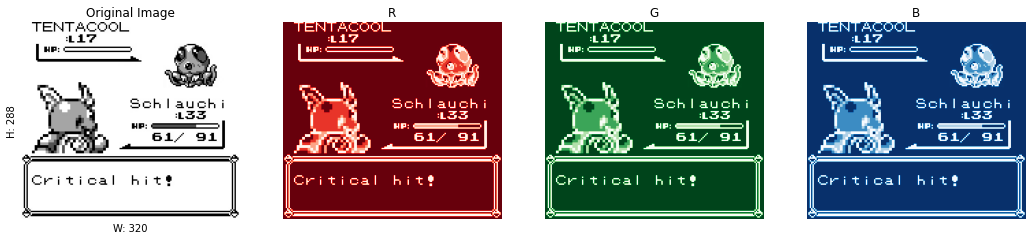

In [123]:
RGBimage_summary(blue)

-------------
Image Summary
-------------
Object type: <class 'numpy.ndarray'>
Image dimensions: (288, 320, 3)
Number of channels: 3
R range: [0, 255]
G range: [0, 255]
B range: [0, 255]


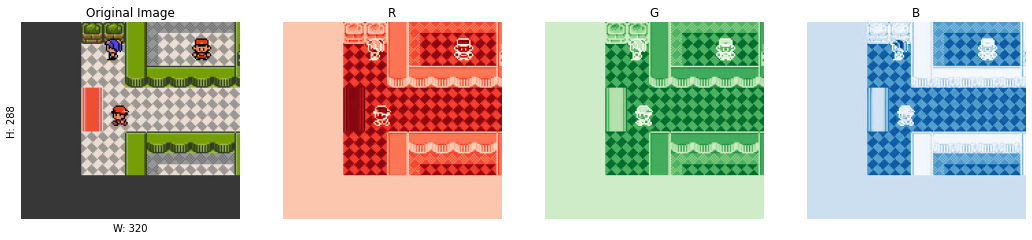

In [124]:
RGBimage_summary(silver)

We see that although the images from Pokemon Blue looks grayscale, the video downloaded from YouTube is actually a RGB video. Hence, we need to convert all Pokemon Blue image files from RGB to actual grayscale.